### Saildrone - March 25/26

**Observations**

- see notes beyond issues addressed here

- Latitude = 37.781094
  Longitude = -122.305265

Data format really wants something more refined than a pandas csv read but with a lot of delimiters specified, it works... its not speedy though

In [1]:
import os
import glob #python >= 3.5

import datetime
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [97]:
root_path = '/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/SaildroneRad_Data_20190326/'


In [421]:
swdata = {}
for filename in sorted(glob.iglob(root_path+'/*SW*.csv', recursive=True), reverse=True):
    print(filename)
    swdata.update({filename.split('/')[-1]: pd.read_csv(filename,header=None,
                                                        sep='"|,|SW Rn', engine='python',
                                                        usecols=[0,2],names=['time','sw'],
                                                        parse_dates=True,index_col='time')})
    

/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/SaildroneRad_Data_20190326/SW1905_20190327000107.csv


In [422]:
swdata['SW1905_20190327000107.csv'].index=swdata['SW1905_20190327000107.csv'].index.tz_localize('Etc/GMT-7')

In [263]:
lwdata = {}
for filename in sorted(glob.iglob(root_path+'/*LW*.csv', recursive=True), reverse=True):
    lwdata.update({filename.split('/')[-1]: pd.read_csv(filename,header=None,
                                                        sep='"|,|Rd|D|C|LW Rn', engine='python',
                                                        usecols=[0,2,4,6,8],names=['time','lwnet','c1','c2','lw'],
                                                        parse_dates=True,index_col='time')})

In [464]:
spn1 = {}
for filename in sorted(glob.iglob(root_path+'/*A*.csv', recursive=True), reverse=True):
    print(filename)
    spn1.update({filename.split('/')[-1]: pd.read_csv(filename,delimiter=',F|,|\t', engine='python', header=None,
                                                      names=['time','total','diffuse','sun','c0','c1','c2','c3',
                                                                                  'c4','c5','c6','c7','temp','something',''],
                                                      error_bad_lines=False,
                                                      parse_dates=True,index_col='time')})

/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/SaildroneRad_Data_20190326/SPN1_A1916_20190327000730.csv
/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/SaildroneRad_Data_20190326/SPN1_A1915_20190327000218.csv
/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/SaildroneRad_Data_20190326/SPN1_A1913_20190327000225.csv


In [432]:
from pysolar.solar import *
import datetime

### example below
from dateutil import tz

solar_hypothetical = pd.DataFrame(columns=('Datetime', 'deg', 'rad','irr'))

for i in range(60*24):

    date = datetime.datetime(2019, 3, 26, 12, tzinfo=datetime.timezone.utc) + datetime.timedelta(minutes=i - 1)
    altitude_deg = get_altitude(37.781094, -122.305265, date)
    rad = radiation.get_radiation_direct(date, altitude_deg)
    irr = rad*np.cos(np.deg2rad(90-altitude_deg))
    solar_hypothetical.loc[i] = [date,altitude_deg,rad,irr]

solar_hypothetical = solar_hypothetical.set_index('Datetime')


In [465]:
for unit, value in spn1.items():
    count=0
    value['sza'] = np.nan
    try:
        value = value.tz_localize('UTC')
    except:
        value = value.tz_convert('UTC')
    spn1[unit] = value

for unit, value in swdata.items():
    count=0
    value['sza'] = np.nan
    try:
        value = value.tz_localize('UTC')
    except:
        value = value.tz_convert('UTC')
    swdata[unit] = value
    

solar_hypothetical['sza'] = np.nan
try:
    solar_hypothetical = solar_hypothetical.tz_localize('UTC')
except:
    solar_hypothetical = solar_hypothetical.tz_convert('UTC')


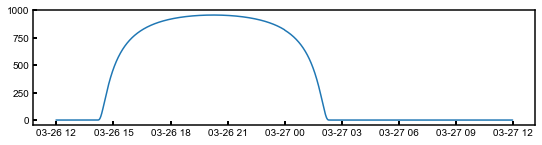

In [466]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(solar_hypothetical.rad)

### Plot Timeseries of Each Instrument including temperatures

(737144.5416666666, 737145.125)

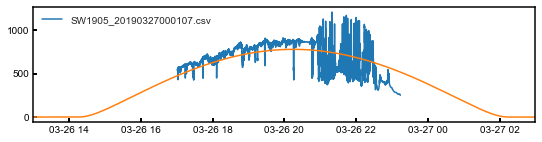

In [467]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in swdata.items():
    plt.plot(value.sw,label=unit)

plt.legend()

plt.plot(solar_hypothetical.irr)
ax1.set_xlim(['2019-03-26 13','2019-03-27 03'])

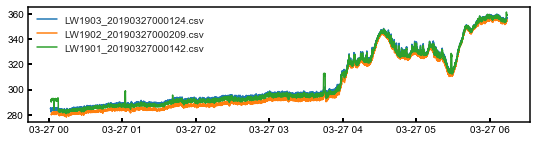

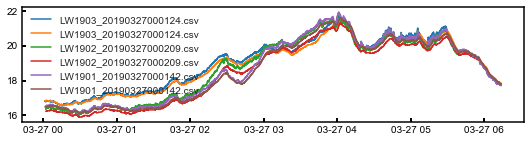

In [135]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in lwdata.items():
    plt.plot(value.lw,label=unit)

plt.legend()

fig = plt.figure(2,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in lwdata.items():
    plt.plot(value.c1,label=unit)
    plt.plot(value.c2,label=unit)

plt.legend()



### Difference Plots

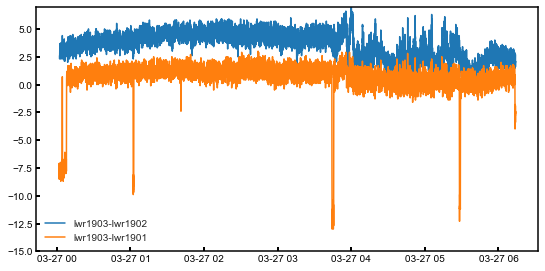

In [268]:
fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(lwdata['LW1903_20190327000124.csv'].lw-lwdata['LW1902_20190327000209.csv'].lw,label='lwr1903-lwr1902')
plt.plot(lwdata['LW1903_20190327000124.csv'].lw-lwdata['LW1901_20190327000142.csv'].lw,label='lwr1903-lwr1901')
ax1.set_ylim([-15,7])
plt.legend()

In [453]:
tmp = (lwdata['LW1903_20190327000124.csv'].lw-lwdata['LW1902_20190327000209.csv'].lw)
print("blue \n median:{} w/m^2 \n std:{} w/m^2".format(tmp.median(),tmp.std()))

tmp = (lwdata['LW1903_20190327000124.csv'].lw-lwdata['LW1901_20190327000142.csv'].lw)
print("orange \n median:{} w/m^2 \n std:{} w/m^2".format(tmp.median(),tmp.std()))


blue 
 median:3.8000000000000114 w/m^2 
 std:1.176678171960742 w/m^2
orange 
 median:0.8999999999999773 w/m^2 
 std:1.5844557421137118 w/m^2


### One-One Plots

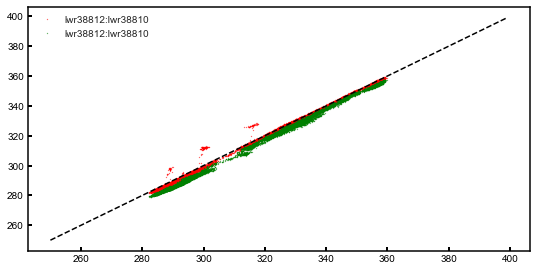

In [291]:
fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(lwdata['LW1903_20190327000124.csv']['2019-3-27 00:15':'2019-3-27 06:10']['lw'].resample('1s').mean(),
         lwdata['LW1901_20190327000142.csv']['2019-3-27 00:15':'2019-3-27 06:10']['lw'].resample('1s').mean(),
         '.r',markersize=.5,
         label='lwr38812:lwr38810')
plt.plot(lwdata['LW1903_20190327000124.csv']['2019-3-27 00:15':'2019-3-27 06:10']['lw'].resample('1s').mean(),
         lwdata['LW1902_20190327000209.csv']['2019-3-27 00:15':'2019-3-27 06:10']['lw'].resample('1s').mean(),
         '.g',markersize=.5,
         label='lwr38812:lwr38810')
plt.plot(range(250,400),range(250,400),'k--')
plt.legend()


Text(0, 0.5, 'SPN1')

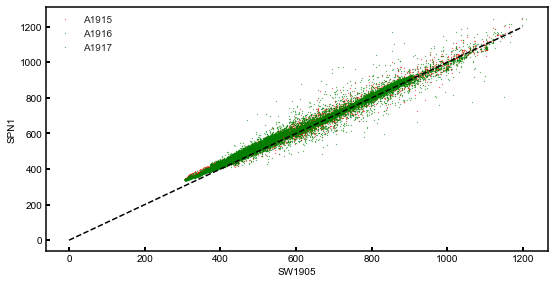

In [606]:
fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

t1 = '2019-03-26 17:30:00'
t2 = '2019-03-26 23:00:00'
t1tz = '2019-03-27 00:30:00'
t2tz = '2019-03-27 6:00:00'
plt.plot(swdata['SW1905_20190327000107.csv'][t1:t2]['sw'].resample('1s').mean(),
         spn1['SPN1_A1915_20190327000218.csv'][t1tz:t2tz]['total'].resample('1s').mean(),
         '.r',markersize=.5,
         label='A1915')
plt.plot(swdata['SW1905_20190327000107.csv'][t1:t2]['sw'].resample('1s').mean(),
         spn1['SPN1_A1916_20190327000730.csv'][t1tz:t2tz]['total'].resample('1s').mean(),
         '.g',markersize=.5,
         label='A1916')
plt.plot(swdata['SW1905_20190327000107.csv'][t1:t2]['sw'].resample('1s').mean()[0:-1],
         spn1['SPN1_A1913_20190327000225.csv'][t1tz:t2tz]['total'].resample('1s').mean(),
         '.g',markersize=.5,
         label='A1917')
plt.plot(range(0,1200),range(0,1200),'k--')
plt.legend()
plt.xlabel('SW1905')
plt.ylabel('SPN1')


### Calculate SZA as this is more comparable paramter than irradiance

In [54]:
### alameda, ca
lat = 37.781094
lon = -122.305265


In [469]:
for unit, value in swdata.items():
    count=0
    value['sza'] = np.nan
 
    for index, row in value.iterrows():
        value['sza'][index] = get_altitude(lat, lon, index)
        if (count % 3600) == 0:
            print(row)
        count+=1
        
    swdata[unit] = value

sw     549.088000
sza     33.284172
Name: 2019-03-26 17:01:10+00:00, dtype: float64
sw     659.423000
sza     43.146578
Name: 2019-03-26 18:01:09+00:00, dtype: float64
sw     700.073000
sza     50.724728
Name: 2019-03-26 19:01:09+00:00, dtype: float64
sw     895.855000
sza     54.421673
Name: 2019-03-26 20:01:09+00:00, dtype: float64
sw     940.653000
sza     53.017656
Name: 2019-03-26 21:01:09+00:00, dtype: float64
sw     751.507000
sza     47.024382
Name: 2019-03-26 22:01:08+00:00, dtype: float64
sw     317.634000
sza     38.050976
Name: 2019-03-26 23:01:08+00:00, dtype: float64


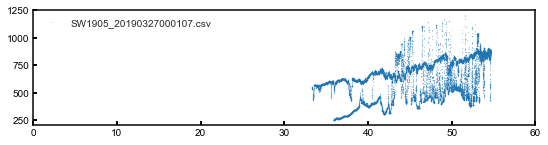

In [470]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in swdata.items():
    plt.plot(value.sza,value.sw,'.',markersize=.25,label=unit)
    
ax1.set_xlim([0,60])

plt.legend()


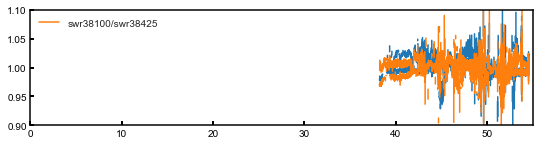

In [540]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

t1 = '2019-03-26 17:30:00'
t2 = '2019-03-26 23:00:00'
t1tz = '2019-03-27 00:30:00'
t2tz = '2019-03-27 6:00:00'
plt.plot(swdata['SW1905_20190327000107.csv'][t1:t2].resample('1s').mean().sza,
         spn1['SPN1_A1915_20190327000218.csv'][t1tz:t2tz].resample('1s').mean().total/spn1['SPN1_A1916_20190327000730.csv'][t1tz:t2tz].resample('1s').mean().total,label='')
plt.plot(swdata['SW1905_20190327000107.csv'][t1:t2].resample('1s').mean().sza,
         spn1['SPN1_A1915_20190327000218.csv'][t1tz:t2tz].resample('1s').mean().total/spn1['SPN1_A1913_20190327000225.csv'][t1tz:t2tz].resample('1s').mean().total,label='swr38100/swr38425')
ax1.set_xlim([0,55])
ax1.set_ylim([.9,1.1])

plt.legend()


### Load/Plot collocated SPN1's (2x)

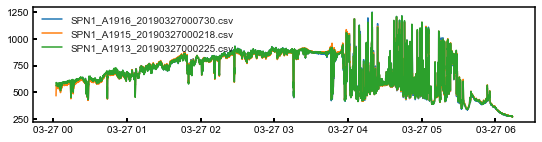

In [487]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in spn1.items():
    plt.plot(value.total,label=unit)

plt.legend()


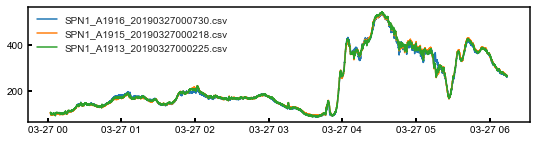

In [488]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in spn1.items():
    plt.plot(value.diffuse,label=unit)

plt.legend()


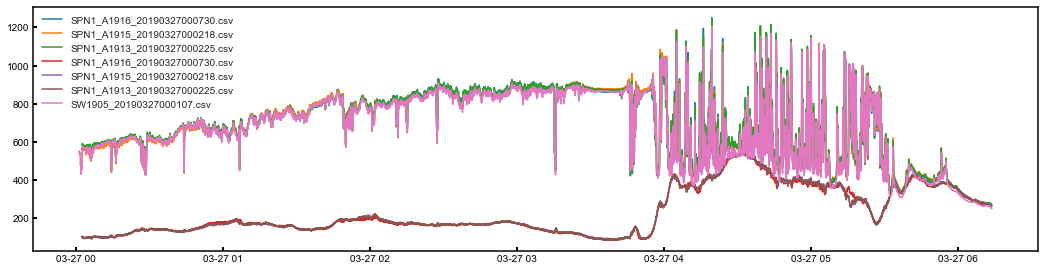

In [611]:
fig = plt.figure(1,figsize=(18,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in spn1.items():
    plt.plot(value.total,label=unit)

for unit, value in spn1.items():
    plt.plot(value.diffuse,label=unit)

for unit, value in swdata.items():
    plt.plot(value.index+datetime.timedelta(hours=7),value.sw,label=unit)


plt.legend()

#ax1.set_xlim(['2019-03-27 3:00:00','2019-03-27 4:00:00'])

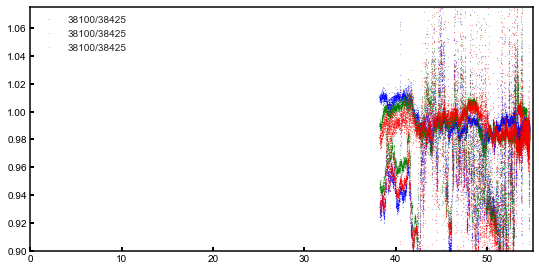

In [542]:
### Choose 38100 as truth (matches a recently cal'd spn1 and is in the middle of data envelope)

fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(swdata['SW1905_20190327000107.csv'][t1:t2].resample('1s').mean().sza,
         (swdata['SW1905_20190327000107.csv'][t1:t2].resample('1s').mean().sw/
         spn1['SPN1_A1915_20190327000218.csv'][t1tz:t2tz].resample('1s').mean().interpolate().total.values),
         'b.',markersize=.25,label='38100/38425')
plt.plot(swdata['SW1905_20190327000107.csv'][t1:t2].resample('1s').mean().sza,
         (swdata['SW1905_20190327000107.csv'][t1:t2].resample('1s').mean().sw/
         spn1['SPN1_A1916_20190327000730.csv'][t1tz:t2tz].resample('1s').mean().interpolate().total.values),
         'g.',markersize=.25,label='38100/38425')
plt.plot(swdata['SW1905_20190327000107.csv'][t1:t2].resample('1s').mean().sza[0:-1],
         (swdata['SW1905_20190327000107.csv'][t1:t2].resample('1s').mean().sw[0:-1]/
         spn1['SPN1_A1913_20190327000225.csv'][t1tz:t2tz].resample('1s').mean().interpolate().total.values),
         'r.',markersize=.25,label='38100/38425')
ax1.set_ylim([0.9,1.075])
ax1.set_xlim([0,55])

plt.legend()


### Now make life tough by comparing to on drone rads

In [570]:
#load saildrone 1min data

def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs)/1e3)


sd1030 = pd.read_csv(root_path + '/sd/sd1030_1min.csv',parse_dates=['timestamp'],date_parser=dateparse, index_col='timestamp')
sd1034 = pd.read_csv(root_path + '/sd/sd1034_1min.csv',parse_dates=['timestamp'],date_parser=dateparse, index_col='timestamp')

(737144.5625, 737144.6875)

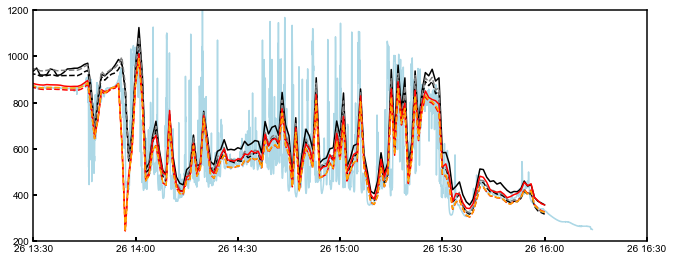

In [627]:
fig = plt.figure(1,figsize=(11,4.25))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in swdata.items():
    plt.plot(value.index+datetime.timedelta(hours=-7),value.sw,'lightblue',label=unit)

plt.plot(sd1030.index,sd1030['report_payload:payload:sw_shaded_radiometer_total_filtered'],'k-')
plt.plot(sd1030.index,sd1030['report_payload:payload:sw_unshaded_radiometer_center_detector_filtered'],'k--')
plt.plot(sd1030.index,sd1030['report_payload:payload:sw_unshaded_radiometer_average_detector_filtered'],'grey',linestyle='--')

plt.plot(sd1034.index,sd1034['report_payload:payload:sw_shaded_radiometer_total_filtered'],'r-')
plt.plot(sd1034.index,sd1034['report_payload:payload:sw_unshaded_radiometer_center_detector_filtered'],'r--')
plt.plot(sd1034.index,sd1034['report_payload:payload:sw_unshaded_radiometer_average_detector_filtered'],'orange',linestyle='--')

plt.plot(sd1034.index,sd1034['report_payload:payload:ir_thermo_temperature_filtered'])

ax1.set_ylim([200,1200])
ax1.set_xlim(['2019-03-26 13:30:00','2019-03-26 16:30:00'])

(737144.3958333334, 737144.6875)

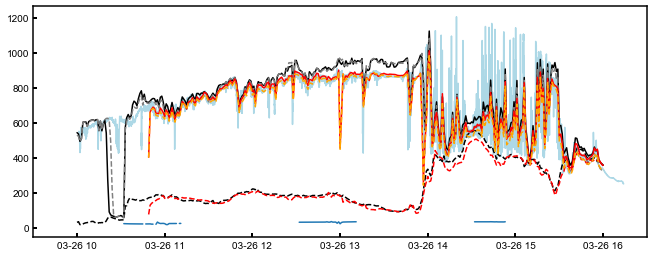

In [632]:
fig = plt.figure(1,figsize=(11,4.25))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in swdata.items():
    plt.plot(value.index+datetime.timedelta(hours=-7),value.sw,'lightblue',label=unit)

plt.plot(sd1030.index,sd1030['report_payload:payload:sw_shaded_radiometer_total_filtered'],'k-')
plt.plot(sd1030.index,sd1030['report_payload:payload:sw_shaded_radiometer_diffuse_filtered'],'k--')
plt.plot(sd1030.index,sd1030['report_payload:payload:sw_unshaded_radiometer_average_detector_filtered'],'grey',linestyle='--')

plt.plot(sd1034.index,sd1034['report_payload:payload:sw_shaded_radiometer_total_filtered'],'r-')
plt.plot(sd1034.index,sd1034['report_payload:payload:sw_shaded_radiometer_diffuse_filtered'],'r--')
plt.plot(sd1034.index,sd1034['report_payload:payload:sw_unshaded_radiometer_average_detector_filtered'],'orange',linestyle='--')

plt.plot(sd1034.index,sd1034['report_payload:payload:ir_thermo_temperature_filtered'])

ax1.set_xlim(['2019-03-26 09:30:00','2019-03-26 16:30:00'])

In [628]:
sd1034.keys()

Index(['report:basic:gps_lat', 'report:basic:gps_lng',
       'report_payload:payload:wind_direction_world_filtered',
       'report_payload:payload:wind_direction_world_rms',
       'report_payload:payload:wind_speed_world_filtered',
       'report_payload:payload:wind_speed_world_rms',
       'report_payload:payload:wind_gust_filtered',
       'report_payload:payload:wind_gust_rms',
       'report_payload:payload:atrh_rh_filtered',
       'report_payload:payload:atrh_rh_rms',
       'report_payload:payload:baro_pressure_filtered',
       'report_payload:payload:baro_pressure_rms',
       'report_payload:payload:atrh_at_filtered',
       'report_payload:payload:atrh_at_rms',
       'report_payload:payload:ctd_temperature_filtered',
       'report_payload:payload:ctd_temperature_rms',
       'report_payload:payload:do2_temperature_filtered',
       'report_payload:payload:do2_temperature_rms',
       'report_payload:payload:rbr_temperature_filtered',
       'report_payload:payload:rbr_